How to Analyze Time Series?

we have to follow the following steps:

1.   Collecting the data and cleaning it
2.   Preparing Visualization with respect to time vs key feature
3. Observing the stationarity of the series
4. Developing charts to understand its nature.
5. Model building – AR, MA, ARMA and ARIMA
6. Extracting insights from prediction



In [ ]:

pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm


In [ ]:
path = 'https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data'
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vamsigontu2308
Your Kaggle Key: ··········


100%|██████████| 352k/352k [00:00<00:00, 58.8MB/s]

In [ ]:
data1 = pd.read_csv('pharma-sales-data/salesmonthly.csv')
data1.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [ ]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [ ]:
data1['datum'] = pd.to_datetime(data1['datum'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   70 non-null     datetime64[ns]
 1   M01AB   70 non-null     float64       
 2   M01AE   70 non-null     float64       
 3   N02BA   70 non-null     float64       
 4   N02BE   70 non-null     float64       
 5   N05B    70 non-null     float64       
 6   N05C    70 non-null     float64       
 7   R03     70 non-null     float64       
 8   R06     70 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 5.0 KB


In [ ]:
data1.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [ ]:
data1.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06'],
      dtype='object')

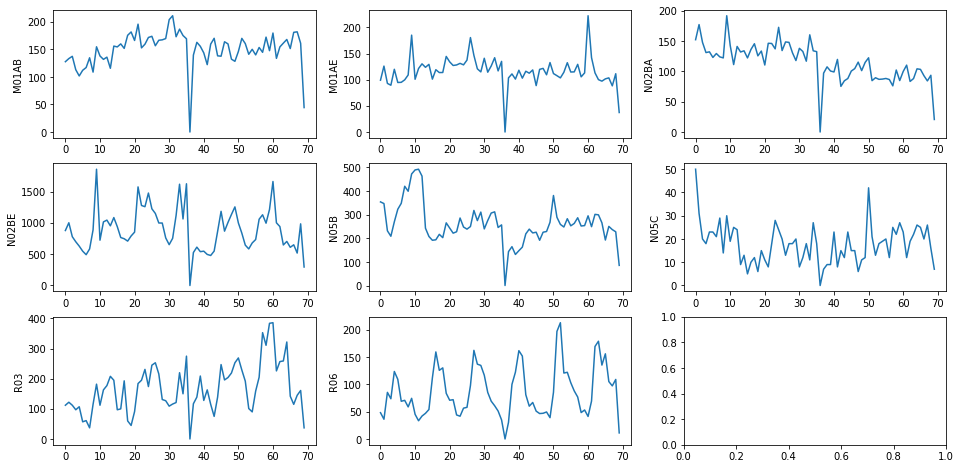

In [ ]:
# create subplots of columns using seaborn
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,8))
sns.lineplot(data=data1['M01AB'], ax=axes[0,0])
sns.lineplot(data=data1['M01AE'], ax=axes[0,1])
sns.lineplot(data=data1['N02BA'], ax=axes[0,2])
sns.lineplot(data=data1['N02BE'], ax=axes[1,0])
sns.lineplot(data=data1['N05B'], ax=axes[1,1])
sns.lineplot(data=data1['N05C'], ax=axes[1,2])
sns.lineplot(data=data1['R03'], ax=axes[2,0])
sns.lineplot(data=data1['R06'], ax=axes[2,1])

# show the plot
plt.show()




Observing the stationarity of the series


In [ ]:
# Augmented Dickey-Fuller (ADF) Test:

# Null Hypothesis (H0): Series is non-stationary
# Alternate Hypothesis (HA): Series is stationary
# p-value >0.05 Fail to reject (H0)
# p-value <= 0.05 Accept (H1)

print(f'Augmented Dickey-Fuller (ADF) Test Results:')
print("")
# Loop through each column in the dataset
for col in data1.columns:
    # Perform the ADF test
    result = adfuller(data1[col])
    
    # Print the results
    print(f'Column: {col}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    # Interpret the result
    if result[1] > 0.05:
        print("Reject null hypothesis, time series is not stationary")
    else:
        print("Fail to reject null hypothesis, time series is stationary")

# KPSS(Kwiatkowski-Phillips-Schmidt-Shin) Test:
print("")
print(f'KPSS(Kwiatkowski-Phillips-Schmidt-Shin) Test Results')
# Iterate through each column in the DataFrame and apply the KPSS test
for col in data1.columns:
    # Run the KPSS test on the current column
    result = kpss(data1[col])
    
    # Print the test statistic and p-value
    print(f"Column '{col}':")
    print(f"Test statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("")

    # Interpret the result
    if result[1] < 0.05:
        print("Reject null hypothesis, time series is not stationary")
    else:
        print("Fail to reject null hypothesis, time series is stationary")



Augmented Dickey-Fuller (ADF) Test Results:

Column: datum
ADF Statistic: 0.897675066452339
p-value: 0.9930599101870312
Critical Values:
	1%: -3.548493559596539
	5%: -2.912836594776334
	10%: -2.594129155766944
Reject null hypothesis, time series is not stationary
Column: M01AB
ADF Statistic: -5.367074694097212
p-value: 3.970457755741786e-06
Critical Values:
	1%: -3.528889992207215
	5%: -2.9044395987933362
	10%: -2.589655654274312
Fail to reject null hypothesis, time series is stationary
Column: M01AE
ADF Statistic: -6.5784272421227605
p-value: 7.621247821188844e-09
Critical Values:
	1%: -3.528889992207215
	5%: -2.9044395987933362
	10%: -2.589655654274312
Fail to reject null hypothesis, time series is stationary
Column: N02BA
ADF Statistic: -2.795159178134275
p-value: 0.058968579012579826
Critical Values:
	1%: -3.530398990560757
	5%: -2.9050874099328317
	10%: -2.5900010121107266
Reject null hypothesis, time series is not stationary
Column: N02BE
ADF Statistic: -3.593004011289762
p-value

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-va

In [ ]:
#ADF results data

data_0 = {'M01AB': [-5.367074694097212, 3.970457755741786e-06, -3.528889992207215, -2.9044395987933362, -2.589655654274312],
        'M01AE': [-6.5784272421227605, 7.621247821188844e-09, -3.528889992207215, -2.9044395987933362, -2.589655654274312],
        'N02BA': [-2.795159178134275, 0.058968579012579826, -3.530398990560757, -2.9050874099328317, -2.5900010121107266],
        'N02BE': [-3.593004011289762, 0.0058961932204407656, -3.530398990560757, -2.9050874099328317, -2.5900010121107266],
        'N05B': [-3.0395958896585666, 0.03135847554939454, -3.528889992207215, -2.9044395987933362, -2.589655654274312],
        'N05C': [-6.767653567958277, 2.6914857820500915e-09, -3.528889992207215, -2.9044395987933362, -2.589655654274312],
        'R03': [-4.019375933017451, 0.001312383291560873, -3.528889992207215, -2.9044395987933362, -2.589655654274312],
        'R06': [-1.433673148591504, 0.5660306144602512, -3.5463945337644063, -2.911939409384601, -2.5936515282964665]}

# Create a DataFrame from the dictionary
adf_df = pd.DataFrame(data_0, index=['ADF Statistic', 'p-value', '1%', '5%', '10%'])

# Transpose the DataFrame to have the columns as the index
adf_df = adf_df.T

# Print the DataFrame
print(f'ADF Results DF:')
print(adf_df)


# KPSS results data

# create a dictionary containing the data
data_1 = {'Column': ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
        'Test statistic': [0.20987087038757862, 0.15732973886986515, 1.2408386243296696, 0.09640524804589132, 
                           0.35840251635184406, 0.23287873726623473, 0.5339277509316569, 0.16010312380089342],
        'P-value': [0.1, 0.1, 0.01, 0.1, 0.09508512226213618, 0.1, 0.034025281321698894, 0.1]}

# create the DataFrame
KPSS_df = pd.DataFrame(data_1)

# print the DataFrame
print(f'KPSS Results DF:')

print(KPSS_df)


ADF Results DF:
       ADF Statistic       p-value        1%        5%       10%
M01AB      -5.367075  3.970458e-06 -3.528890 -2.904440 -2.589656
M01AE      -6.578427  7.621248e-09 -3.528890 -2.904440 -2.589656
N02BA      -2.795159  5.896858e-02 -3.530399 -2.905087 -2.590001
N02BE      -3.593004  5.896193e-03 -3.530399 -2.905087 -2.590001
N05B       -3.039596  3.135848e-02 -3.528890 -2.904440 -2.589656
N05C       -6.767654  2.691486e-09 -3.528890 -2.904440 -2.589656
R03        -4.019376  1.312383e-03 -3.528890 -2.904440 -2.589656
R06        -1.433673  5.660306e-01 -3.546395 -2.911939 -2.593652
KPSS Results DF:
  Column  Test statistic   P-value
0  M01AB        0.209871  0.100000
1  M01AE        0.157330  0.100000
2  N02BA        1.240839  0.010000
3  N02BE        0.096405  0.100000
4   N05B        0.358403  0.095085
5   N05C        0.232879  0.100000
6    R03        0.533928  0.034025
7    R06        0.160103  0.100000


In [ ]:
# # Define the window size for rolling statistics
# window_size = 1

# # Iterate through each column in the DataFrame and compute rolling statistics
# for column in data1.columns:
#     # Compute rolling mean and standard deviation for the current column
#     rolling_mean = data1[column].rolling(window_size).mean()
#     rolling_std = data1[column].rolling(window_size).std()

#     # Add new columns to the DataFrame for the rolling statistics
#     data1[f'{column}_rolling_mean'] = rolling_mean
#     data1[f'{column}_rolling_std'] = rolling_std

# # Print the updated DataFrame with rolling statistics
# print(data1.head())

In [ ]:
# Log Transformation:

# Apply the logarithmic transformation to the data
data1['log_value_N02BA'] = np.log(data1['N02BA'])
data1['log_value_R06'] = np.log(data1['R06'])

# Print the updated DataFrame with transformed data
print(data1.head())

# difference - First difference 

# Compute the first difference of the data
data1['diff_N02BA'] = data1['log_value_N02BA'].diff()
data1['diff_R06'] = data1['log_value_R06'].diff()

# Drop the first row, which contains a NaN value
data1.dropna(inplace=True)

# Print the updated DataFrame with differenced data
print(data1.head())

       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06  \
0 2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2   
1 2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2   
2 2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4   
3 2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7   
4 2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7   

   log_value_N02BA  log_value_R06  
0         5.024538       3.875359  
1         5.176150       3.589059  
2         4.994878       4.447346  
3         4.874434       4.300003  
4         4.883559       4.817859  
       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06  \
1 2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2   
2 2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4   
3 2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   7

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 1 to 69
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datum            69 non-null     datetime64[ns]
 1   M01AB            69 non-null     float64       
 2   M01AE            69 non-null     float64       
 3   N02BA            69 non-null     float64       
 4   N02BE            69 non-null     float64       
 5   N05B             69 non-null     float64       
 6   N05C             69 non-null     float64       
 7   R03              69 non-null     float64       
 8   R06              69 non-null     float64       
 9   log_value_N02BA  69 non-null     float64       
 10  log_value_R06    69 non-null     float64       
 11  diff_N02BA       69 non-null     float64       
 12  diff_R06         69 non-null     float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 7.5 KB


In [ ]:
data1.isnull().sum()

datum              0
M01AB              0
M01AE              0
N02BA              0
N02BE              0
N05B               0
N05C               0
R03                0
R06                0
log_value_N02BA    0
log_value_R06      0
diff_N02BA         0
diff_R06           0
dtype: int64

<Axes: ylabel='diff_R06'>

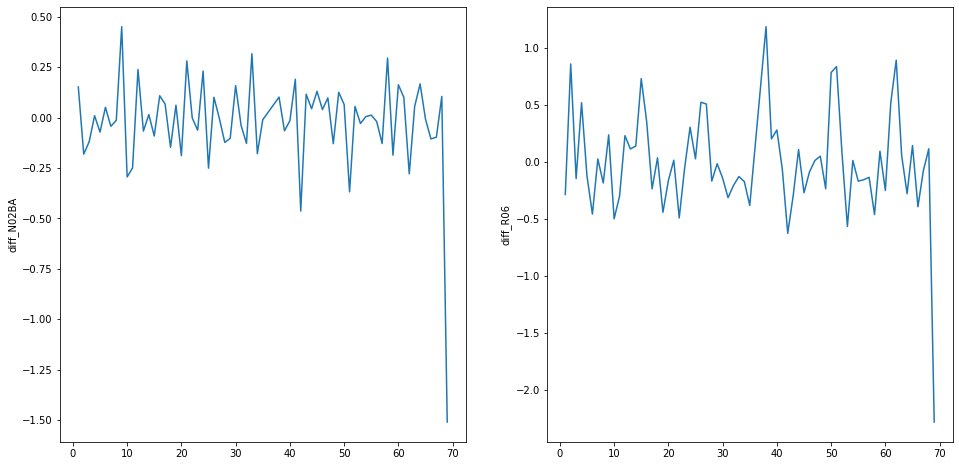

In [ ]:
# create subplots of columns using seaborn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.lineplot(data=data1['diff_N02BA'], ax=axes[0])
sns.lineplot(data=data1['diff_R06'], ax=axes[1])

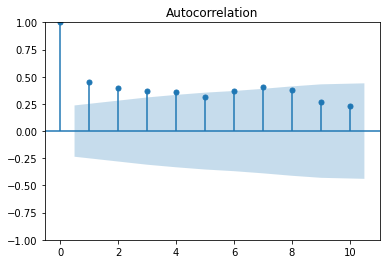

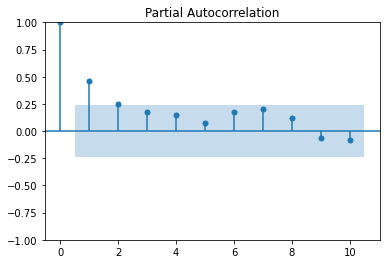

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(data1['N02BA'], lags=10)
plt.show()

# PACF plot
plot_pacf(data1['N02BA'], lags=10)
plt.show()

In [ ]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(data1['M01AB'], order=(2, 1, 1))
results = model_1.fit()


# Model summary
print(results.summary())

# AIC and BIC
print('AIC:', results.aic)
print('BIC:', results.bic)

# RMSE
residuals = results.resid
rmse = np.sqrt(np.mean(residuals**2))
print('RMSE:', rmse)



                               SARIMAX Results                                
Dep. Variable:                  M01AB   No. Observations:                   69
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -330.101
Date:                Tue, 21 Mar 2023   AIC                            668.201
Time:                        05:11:15   BIC                            677.079
Sample:                             0   HQIC                           671.719
                                 - 69                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3129      0.143      2.184      0.029       0.032       0.594
ar.L2          0.0606      0.177      0.341      0.733      -0.287       0.408
ma.L1         -0.9996      6.748     -0.148      0.8

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


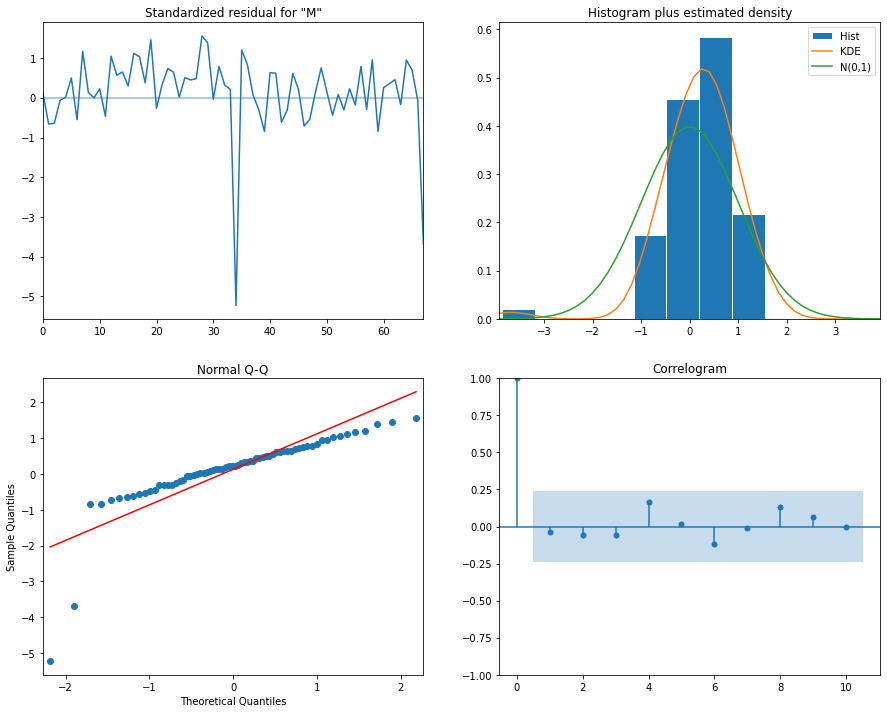

In [ ]:
# Residuals Plot:

results.plot_diagnostics(figsize=(15, 12))
plt.show()


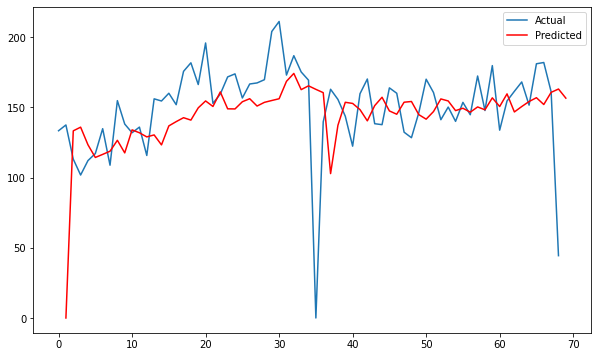

In [ ]:
# Actual vs Predicted Plot: 

plt.figure(figsize=(10,6))
plt.plot(data1['M01AB'].values, label='Actual')
plt.plot(results.fittedvalues, color='red', label='Predicted')
plt.legend()
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


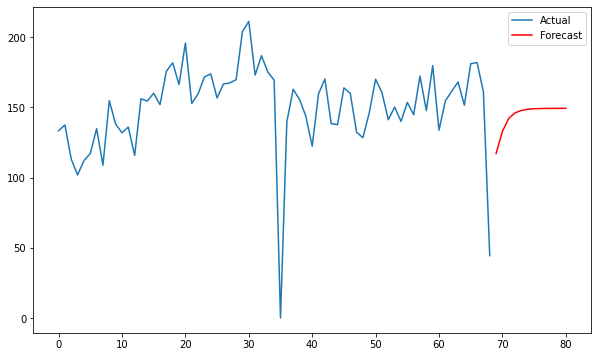

In [ ]:
# Forecast Plot:

forecast = results.forecast(steps=12)
plt.figure(figsize=(10,6))
plt.plot(data1['M01AB'].values, label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.show()
